# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [106]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import t
from scipy.stats import sem
from statsmodels.stats.proportion import proportions_ztest

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:
salaries = pd.read_csv('./data/hypothesis-testing.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [5]:
salaries.isnull().sum().to_frame('Total_nulls').reset_index()

,index,Total_nulls
0,Name,0
1,Job Titles,0
2,Department,0
3,Full or Part-Time,0
4,Salary or Hourly,0
5,Typical Hours,25161
6,Annual Salary,8022
7,Hourly Rate,25161


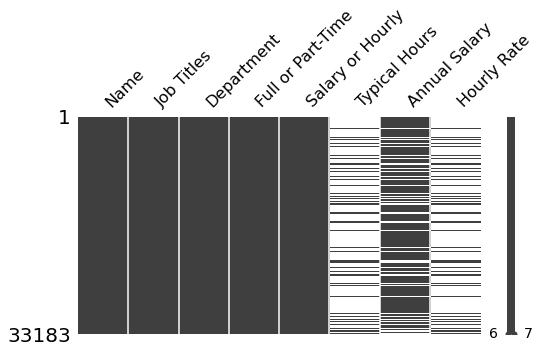

In [6]:
import missingno
missingno.matrix(salaries, figsize=(8, 4));

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [7]:
# Your code here:
salaries['Salary or Hourly'].value_counts().to_frame()

,Salary or Hourly
Salary,25161
Hourly,8022


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [8]:
# Your code here:

salaries['Department'].value_counts().to_frame()

,Department
POLICE,13414
FIRE,4641
STREETS & SAN,2198
OEMC,2102
WATER MGMNT,1879
AVIATION,1629
TRANSPORTN,1140
PUBLIC LIBRARY,1015
GENERAL SERVICES,980
FAMILY & SUPPORT,615


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [9]:
# Your code here:
from scipy.stats import ttest_1samp

hourly_rate = salaries['Hourly Rate'].dropna()


hypo_result = ttest_1samp(hourly_rate, 30.0)
hypo_result
display(hypo_result.statistic)
display(hypo_result.pvalue)

20.6198057854942

4.3230240486229894e-92

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [10]:
salaries[(salaries['Department']=='POLICE')&(salaries['Salary or Hourly']=='Salary')]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
...,...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [11]:
# Your code here:

police = salaries[(salaries['Department']=='POLICE')&(salaries['Salary or Hourly']=='Salary')]
police_rate = police['Annual Salary']

h_result = ttest_1samp(police_rate, 86000)
h_result
display(h_result.statistic)
display(h_result.pvalue/2)

3.081997005712994

0.0010301701775482569

Using the `crosstab` function, find the department that has the most hourly workers. 

In [116]:
# Your code here:
crosstab = pd.crosstab(salaries['Salary or Hourly'], salaries['Department'])
most_hourly = crosstab.T['Hourly'].sort_values(ascending=False).head(1).to_frame().reset_index()
most_hourly

,Department,Hourly
0,STREETS & SAN,1862


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [13]:
# Your code here:
most_hourly_workers = salaries[salaries['Department']=='STREETS & SAN']

hourly_rate = most_hourly_workers['Hourly Rate'].dropna()
most_hourly_result=ttest_1samp(hourly_rate,35.00)
display(most_hourly_result.statistic)
display(most_hourly_result.pvalue/2)

-9.567447887848152

1.6689265282353859e-21

In [14]:
most_hourly_workers = salaries[salaries['Department']=='STREETS & SAN']
mu_hat = most_hourly_workers['Hourly Rate'].mean()
std_hat= most_hourly_workers['Hourly Rate'].std()
n = most_hourly_workers['Department'].count()
#n=1200
mu = 35

t_test = (mu_hat - mu)/ (std_hat/np.sqrt(n))
rv = t(df=n-1)
p_value = rv.cdf(t_test)
p_value

4.849492406176659e-25

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [32]:
# Your code here:
hourly_rate = salaries['Hourly Rate'].dropna()
hourly_wage = hourly_rate.count()-1
mean_hourly_wage = hourly_rate.mean()
hourly = sem(hourly_rate, axis=0, ddof=hourly_wage)
conf_interv_hourly=t.interval(0.95, hourly_wage, loc=mean_hourly_wage, scale=hourly)
conf_interv_hourly

(9.046248541993936, 56.53086689056654)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [85]:
police_dep = salaries[salaries['Department'].str.contains('POLICE')]
print(police_dep['Department'].unique())
cross_police = pd.crosstab(police_dep['Salary or Hourly'], police_dep['Department'])
cross_police

['POLICE' 'POLICE BOARD']


Department,POLICE,POLICE BOARD
Salary or Hourly,,
Hourly,10,0
Salary,13404,2


In [105]:
# Your code here:
most_salalried_police = cross_police['POLICE']['Salary']+cross_police['POLICE BOARD']['Salary']
police_len = len(police_dep['Annual Salary'].dropna())-1
mean_salary_error = sem(police_dep['Annual Salary'].dropna(), axis=0, ddof=police_len)
mean_police_salary = police_dep['Annual Salary'].dropna().mean()
conf_interv_salary = t.interval(0.95, police_len, loc=mean_police_salary, scale=mean_salary_error)
conf_interv_salary

(50671.13382417666, 122301.59062756138)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [129]:
# Your code here:

Hypo_statistic, Hypo_pval = proportions_ztest(count=sum(most_hourly_workers),nobs=salaries['Name'].count(), value=0.25)
Hypo_pval

0.0004481127249057967

La hipotesis nula es rechazada